# EDA

## Original Dataset
1. There's no missing values in the dataframe
2. All images in this dataset have uniform size (1050 * 1050)
3. Image names in the dataframe correspond with actual image names
4. Image urls in the dataframe are invalid
5. Annotations CSV file only marked where the sign is located in the images without any label, so we have to label the images by ourselves
6. There are 1538 images in the training dataset in total, but there are 2257 signs in total because one picture sometimes contain more than one signs
7. There's no night time pictures

In [1]:
import pandas as pd

df = pd.read_csv('./SF Parking Sign Detection/trainingset_annotations.csv')
df

,image_name,image_url,xmin,xmax,ymin,ymax
0,Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg,https://requestor-proxy.figure-eight.com/figur...,59,109,300,357
1,Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg,https://requestor-proxy.figure-eight.com/figur...,53,101,257,309
2,FGmto9ZBGMNr_s4_c89G_g_zoom_5___1_11.jpg,https://requestor-proxy.figure-eight.com/figur...,710,826,295,433
3,1Qn5_JRh_Bb8axrWdUej8A_zoom_5___1_9.jpg,https://requestor-proxy.figure-eight.com/figur...,347,389,218,317
4,1Qn5_JRh_Bb8axrWdUej8A_zoom_5___1_9.jpg,https://requestor-proxy.figure-eight.com/figur...,342,381,316,425
...,...,...,...,...,...,...
2252,y1SR9VEd5KAen1iusx2Hdg_zoom_5___1_5.jpg,https://requestor-proxy.figure-eight.com/figur...,538,590,298,354
2253,ZBoz4vPEr1c9Qz25C6CV-g_zoom_5___1_0.jpg,https://requestor-proxy.figure-eight.com/figur...,685,723,306,349
2254,ZBoz4vPEr1c9Qz25C6CV-g_zoom_5___1_12.jpg,https://requestor-proxy.figure-eight.com/figur...,833,874,286,328
2255,zCtKblvtFS0olTVtnOHWbQ_zoom_5___1_7.jpg,https://requestor-proxy.figure-eight.com/figur...,265,299,262,301


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  2257 non-null   object
 1    image_url  2257 non-null   object
 2    xmin       2257 non-null   int64 
 3    xmax       2257 non-null   int64 
 4    ymin       2257 non-null   int64 
 5    ymax       2257 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 105.9+ KB


In [3]:
df.describe()

,xmin,xmax,ymin,ymax
count,2257.000000,2257.000000,2257.000000,2257.000000
mean,516.705361,572.592379,309.746566,384.462561
std,302.748791,303.288366,170.445509,173.910269
min,0.000000,29.000000,0.000000,13.000000
25%,245.000000,303.000000,233.000000,301.000000
50%,524.000000,583.000000,287.000000,350.000000
75%,786.000000,844.000000,339.000000,415.000000
max,1037.000000,1050.000000,1022.000000,1050.000000


In [4]:
from pathlib import Path

PATH = Path("./SF Parking Sign Detection/trainingset/trainingset")
list(PATH.iterdir())[:5]

[PosixPath('SF Parking Sign Detection/trainingset/trainingset/j405wJThv5K_xS8DfusUow_zoom_5___1_6.jpg'),
 PosixPath('SF Parking Sign Detection/trainingset/trainingset/Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg'),
 PosixPath('SF Parking Sign Detection/trainingset/trainingset/57RyEsvd32kH-qe4mk8d8Q_zoom_5___2_1.jpg'),
 PosixPath('SF Parking Sign Detection/trainingset/trainingset/FGmto9ZBGMNr_s4_c89G_g_zoom_5___1_11.jpg'),
 PosixPath('SF Parking Sign Detection/trainingset/trainingset/hjFahFKnmHpdqzToLzjmsQ_zoom_5___1_12.jpg')]

In [5]:
import cv2
import matplotlib.pyplot as plt 

def read_image(path):
    img = cv2.imread(str(path))
    if img is None:
        return None
    else:
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

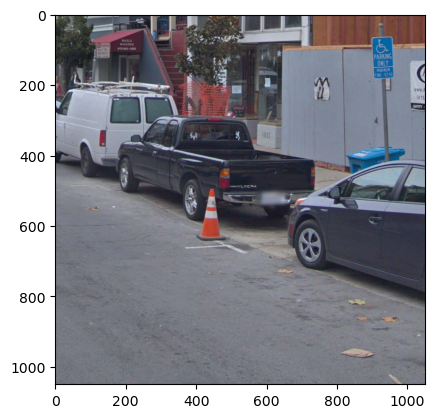

In [6]:
path = PATH/'57RyEsvd32kH-qe4mk8d8Q_zoom_5___2_1.jpg'
img = read_image(path)
plt.imshow(img)

In [7]:
img = cv2.imread(str(path))
img.shape

(1050, 1050, 3)

In [8]:
import numpy as np

files = list(PATH.iterdir())
imgs = [read_image(str(p)).shape for p in files if read_image(str(p)) is not None]
np.unique(imgs)

array([   3, 1050])

In [9]:
print(f'Number of pictures: {len(files)}')

Number of pictures: 1538


All images are of the same size

## Dataset with Labels
1.  There are five kinds of parking signs in the dataset: No Parking, 1 Hour Parking, 2 Hour Parking, No Parking Anytime, and Disabled Parking
2.  The number of No Parking signs are more than other types of signs combined

In [11]:
import os

classes_path = './dataset/classes.txt'

with open(classes_path, 'r') as file:
    classes = [line.strip() for line in file.readlines()]

labels_path = './dataset/labels'
label_data = {}

for label_file in os.listdir(labels_path):
    image_name = label_file.replace('.txt', '')
    with open(os.path.join(labels_path, label_file), 'r') as file:
        boxes = [line.strip().split() for line in file.readlines()]
        label_data[image_name] = [{
            'class_index': int(box[0]),
            'x_center': float(box[1]),
            'y_center': float(box[2]),
            'width': float(box[3]),
            'height': float(box[4]),
            'class_label': classes[int(box[0])]
        } for box in boxes]


In [12]:
from PIL import Image
import matplotlib.pyplot as plt

images_path = './dataset/images'

def show_image_with_boxes(image_name):
    image_path = os.path.join(images_path, f'{image_name}.jpg')  # Adjust the extension as necessary
    image = Image.open(image_path)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    
    for box in label_data[image_name]:
        left = (box['x_center'] - box['width'] / 2) * image.width
        top = (box['y_center'] - box['height'] / 2) * image.height
        width = box['width'] * image.width
        height = box['height'] * image.height
        
        rect = plt.Rectangle((left, top), width, height, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        
        label = box['class_label']
        
        plt.gca().text(left, top, label, bbox=dict(facecolor='yellow', alpha=0.5), clip_on=True, fontsize=8)
    
    plt.axis('off')
    plt.show()


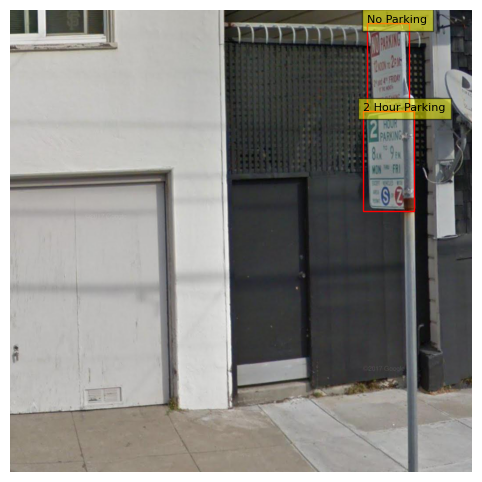

In [13]:
show_image_with_boxes('fFIe4rNoNM5_VGcGG5Z_lg_zoom_5___1_10')

In [11]:
import json

labels_file = './SF Parking Sign Detection/annotations.json' 

with open(labels_file) as f:
    data = json.load(f)

def get_sign_counts(data):
    sign_count_dict = {'No Parking': 0, '1 Hour Parking': 0, '2 Hour Parking': 0, 'No Parking Anytime': 0, 'Disabled Parking Only': 0}
    for image_data in data:
        annotation = image_data['annotations'][0]
        for r in annotation['result']:
            value = r['value']
            if 'rectanglelabels' in value:
                parking_sign_type = value['rectanglelabels'][0] if len(value['rectanglelabels']) > 0 else None
                if parking_sign_type != None:
                    sign_count_dict[parking_sign_type] += 1
    return sign_count_dict

sign_count_dict = get_sign_counts(data)
print(sign_count_dict)

{'No Parking': 1362, '1 Hour Parking': 84, '2 Hour Parking': 459, 'No Parking Anytime': 168, 'Disabled Parking Only': 8}


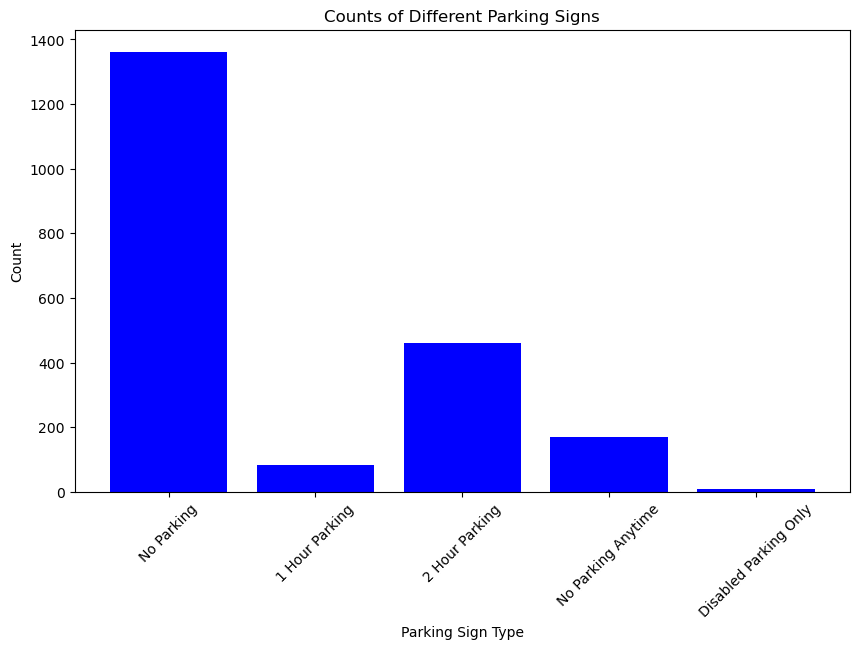

In [12]:
import matplotlib.pyplot as plt

df = pd.DataFrame(list(sign_count_dict.items()), columns=['Type', 'Count'])

plt.figure(figsize=(10, 6))
plt.bar(df['Type'], df['Count'], color='blue')
plt.xlabel('Parking Sign Type')
plt.ylabel('Count')
plt.title('Counts of Different Parking Signs')
plt.xticks(rotation=45)
plt.show()

## Split dataset into train, validation and test dataset

In [14]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

image_dir = './dataset/images'
label_dir = './dataset/labels'

files = [f.split('.')[0] for f in os.listdir(image_dir) if f.endswith('.jpg')]

train_val_files, test_files = train_test_split(files, test_size=0.1, random_state=42)

train_files, val_files = train_test_split(train_val_files, test_size=0.1, random_state=42)

def link_files(files, source_dir, target_dir, file_type):
    for f in files:
        src_path = os.path.join(source_dir, f + file_type)
        tgt_path = os.path.join(target_dir, f + file_type)
        if not os.path.exists(tgt_path):
            os.symlink(src_path, tgt_path)

os.makedirs('data/images/train', exist_ok=True)
os.makedirs('data/images/val', exist_ok=True)
os.makedirs('data/images/test', exist_ok=True)
os.makedirs('data/labels/train', exist_ok=True)
os.makedirs('data/labels/val', exist_ok=True)
os.makedirs('data/labels/test', exist_ok=True)

link_files(train_files, image_dir, 'data/images/train', '.jpg')
link_files(val_files, image_dir, 'data/images/val', '.jpg')
link_files(test_files, image_dir, 'data/images/test', '.jpg')
link_files(train_files, label_dir, 'data/labels/train', '.txt')
link_files(val_files, label_dir, 'data/labels/val', '.txt')
link_files(test_files, label_dir, 'data/labels/test', '.txt')


In [15]:
from ultralytics import YOLO

model = YOLO(model='yolov8n.pt')

model.train(
    data='./data/my_dataset.yaml',  # Path to your dataset configuration file
    epochs=200,  # Number of epochs to train for
    batch=16,  # Batch size, adjust based on your GPU memory
    imgsz=640  # Image size, adjust as per your requirements
)

New https://pypi.org/project/ultralytics/8.2.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/my_dataset.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False

train: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/labels/train... 36

train: WARNING ⚠️ /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/images/train/-G-V2woVL8S-1hjHoZaIAg_zoom_5___1_5.jpg: ignoring corrupt image/label: [Errno 2] No such file or directory: '/Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/images/train/-G-V2woVL8S-1hjHoZaIAg_zoom_5___1_5.jpg'
train: WARNING ⚠️ /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/images/train/-U6P4V7AsypkFke2Rc85FA_zoom_5___1_6.jpg: ignoring corrupt image/label: [Errno 2] No such file or directory: '/Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/images/train/-U6P4V7AsypkFke2Rc85FA_zoom_5___1_6.jpg'
train: WARNING ⚠️ /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/images/train/-UzwmrW7VphsWuYYJfSskQ_zoom_5___1_11.jpg: ignoring corrupt image/label: [Errno 2] No such file o

train: New cache created: /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/labels/train.cache


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/labels/val... 79 ima

val: WARNING ⚠️ /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/images/val/0RYP7_W130q0fpHOipNd5Q_zoom_5___1_6.jpg: ignoring corrupt image/label: [Errno 2] No such file or directory: '/Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/images/val/0RYP7_W130q0fpHOipNd5Q_zoom_5___1_6.jpg'
val: WARNING ⚠️ /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/images/val/0nvudqkPefq_VkPPa6MSlg_zoom_5___1_7.jpg: ignoring corrupt image/label: [Errno 2] No such file or directory: '/Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/images/val/0nvudqkPefq_VkPPa6MSlg_zoom_5___1_7.jpg'
val: WARNING ⚠️ /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/images/val/0swcVteoRKRtDRLkwomEyg_zoom_5___1_1.jpg: ignoring corrupt image/label: [Errno 2] No such file or directory: '/Us

Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200         0G      1.391      5.709      1.247         31        640:   4%|▍         | 1/23 [00:38<13:58, 38.13s/it]


KeyboardInterrupt: 

In [ ]:
metrics = model.val()
metrics

In [15]:
# import json
# import os
# from pathlib import Path

# dataset_dir = Path('./SF Parking Sign Detection/')
# labels_file = dataset_dir / 'annotations.json' 
# output_dir = dataset_dir / 'no_parking_signs'
# output_dir.mkdir(exist_ok=True) 

# with open(labels_file) as f:
#     data = json.load(f)

# def process_annotations(data):
#     for image_data in data:
#         has_no_parking = False
#         annotation = image_data['annotations'][0]
#         for r in annotation['result']:
#             value = r['value']
#             if 'rectanglelabels' in value and 'No Parking' in value['rectanglelabels']:
#                 print('has no parking is true')
#                 has_no_parking = True
#         if has_no_parking:
#             print(original_img_path)
#             symlink_path = output_dir / image_data['data']['image'].split('/')[-1]
#             if not symlink_path.exists():
#                 symlink_path.symlink_to(original_img_path)

# # Assuming the JSON structure is a list of annotations
# process_annotations(data)

# print(f"All 'No Parking' signs have been symlinked to {output_dir}")

import json
import os
from pathlib import Path
import shutil 

dataset_dir = Path('./SF Parking Sign Detection/')
labels_file = dataset_dir / 'annotations.json' 
output_dir = dataset_dir / 'no_parking_signs_1'
output_dir.mkdir(exist_ok=True)

with open(labels_file) as f:
    data = json.load(f)

def process_annotations(data):
    for image_data in data:
        has_no_parking = False
        annotation = image_data['annotations'][0]
        for r in annotation['result']:
            value = r['value']
            if 'rectanglelabels' in value and 'No Parking' in value['rectanglelabels']:
                has_no_parking = True
        if has_no_parking:
            original_img_path = '/' + image_data['data']['image'].split('=')[1]
            output_img_path = output_dir / image_data['data']['image'].split('/')[-1] 
            if not output_img_path.exists():
                shutil.copy(original_img_path, output_img_path) 
                print(f"Copied: {original_img_path} to {output_img_path}")

process_annotations(data)

print(f"All 'No Parking' signs have been copied to {output_dir}")

Copied: /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/SF Parking Sign Detection/trainingset/trainingset/9Adllc1SN-H-VcfeRCyxSQ_zoom_5___1_5.jpg to SF Parking Sign Detection/no_parking_signs_1/9Adllc1SN-H-VcfeRCyxSQ_zoom_5___1_5.jpg
Copied: /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/SF Parking Sign Detection/trainingset/trainingset/o3TC_BJk_UbhuX7S8X-4cQ_zoom_5___1_12.jpg to SF Parking Sign Detection/no_parking_signs_1/o3TC_BJk_UbhuX7S8X-4cQ_zoom_5___1_12.jpg
Copied: /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/SF Parking Sign Detection/trainingset/trainingset/U83tbOMufgx9Ty_yQ77qaQ_zoom_5___1_11.jpg to SF Parking Sign Detection/no_parking_signs_1/U83tbOMufgx9Ty_yQ77qaQ_zoom_5___1_11.jpg
Copied: /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/SF Parking Sign Detection/trainingset/trainingset/PKHG8GwMpI1D

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/SF Parking Sign Detection/trainingset/trainingset/_2ND8a78BaN_OQ4BxEnT6w_zoom_5___1_11.jpg'

In [18]:
import json
from pathlib import Path
import shutil

# Paths setup
dataset_dir = Path('.')
labels_file = dataset_dir / 'annotations.json'

# Create two output directories
output_dir1 = dataset_dir / 'no_parking_signs_2'
output_dir2 = dataset_dir / 'no_parking_signs_3'
output_dir1.mkdir(exist_ok=True)
output_dir2.mkdir(exist_ok=True)

# Load data
with open(labels_file) as f:
    data = json.load(f)

def process_annotations(data):
    no_parking_images = [] 

    for image_data in data:
        has_no_parking = False
        annotation = image_data['annotations'][0]
        for r in annotation['result']:
            value = r['value']
            if 'rectanglelabels' in value and 'No Parking' in value['rectanglelabels']:
                has_no_parking = True
        if has_no_parking:
            original_img_path = '/' + image_data['data']['image'].split('=')[1]
            no_parking_images.append(original_img_path)

    half_size = len(no_parking_images) // 2
    for index, img_path in enumerate(no_parking_images):
        if index < half_size:
            output_path = output_dir1 / img_path.split('/')[-1]
        else:
            output_path = output_dir2 / img_path.split('/')[-1]
        
        if not output_path.exists():
            shutil.copy(img_path, output_path)
            print(f"Copied: {img_path} to {output_path}")

process_annotations(data)

print(f"Images have been distributed between {output_dir1} and {output_dir2}")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/trainingset/Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg'